# Multilingual Embedding model test
The core idea behind multilingual embeddings is to map semantically similar concepts from different languages to nearby points in the vector space. For instance, the word "cat" in English and its equivalent "گربه" in Persian would be close together in the embedding space, despite the linguistic differences. This alignment allows for direct comparison and computation across languages, facilitating tasks like cross-lingual text classification, multilingual search, and more.

In this notebook we will test these Models:
- [LaBSE](https://huggingface.co/sentence-transformers/LaBSE)
- [use-cmlm-multilingual](https://huggingface.co/sentence-transformers/use-cmlm-multilingual)
- [gte-multilingual-base](https://huggingface.co/Alibaba-NLP/gte-multilingual-base)
- [distiluse-base-multilingual-cased-v2](https://huggingface.co/sentence-transformers/distiluse-base-multilingual-cased-v2)
- [paraphrase-multilingual-MiniLM-L12-v2](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2)
- [nomic-embed-text-v1.5](https://huggingface.co/nomic-ai/nomic-embed-text-v1.5)

First lets install libraries and write some functions to have a better look at the data.

In [1]:
!pip install sentence-transformers
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.8 MB/s eta 0:00:00


In [1]:
import pandas as pd

df = pd.read_csv('Sentences.csv')

df.drop('Unnamed: 1', axis = 1, inplace = True)
df.dropna(inplace = True)
df.columns = ['Persian', 'English']
df.head()

,Persian,English
0,من امروز احساس خوشحالی می‌کنم.,"Today, I feel happy."
1,امروز یکی از آن روزهاست که واقعاً احساس خوشحال...,Today is one of those days when I truly feel a...
3,من ناراحتم.,I am sad.
4,امروز حس ناراحتی دارم.,"Today, I feel sad."
5,امروز روزی است که احساس ناراحتی می‌کنم، چرا که...,Today is a day when I feel sad because several...


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns

class test_model:
  def __init__(self, model, data):
    self._fa_sentences = data.loc[:, 'Persian'].tolist()
    self._en_sentences = data.loc[:, 'English'].tolist()

    self._fa_embeds = model.encode(self._fa_sentences)
    self._en_embeds = model.encode(self._en_sentences)

    self.similarities = None

  def get_similarities(self):
    similarities = pd.DataFrame(index=list(range(len(self._fa_embeds))), columns=list(range(len(self._en_embeds))), dtype=float)

    for fa_index in range(len(self._fa_embeds)):
      for en_index in range(len(self._en_embeds)):
        fa_embed = self._fa_embeds[fa_index]
        en_embed = self._en_embeds[en_index]

        similarities.loc[fa_index, en_index] = cosine_similarity(np.array([fa_embed]), np.array([en_embed]))

    self.similarities = similarities

    return similarities

  def plot_similarities(self):
    sns.heatmap(self.similarities)

## LaBSE (Language-agnostic BERT Sentence Embedding)
LaBSE is a multilingual model designed for creating language-agnostic sentence embeddings. It is trained to produce similar embeddings for semantically similar sentences across different languages. It is particularly useful for cross-lingual tasks like translation and cross-lingual retrieval.

- **Maximum Token Support:** 256 tokens per encode.
- **Number of Supported Languages:** 109 languages.
- **Dimensions:** 768 dimensions.

Lets test it out.

In [5]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('sentence-transformers/LaBSE')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sentence_transformers/models/Dense.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(input_path, "pytorch_

In [21]:
labse_test = test_model(model, df)

In [22]:
labse_test.get_similarities()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.900481,0.606946,0.555755,0.781894,0.422869,0.387667,0.649716,0.470376,0.373514,0.500588,...,0.146453,0.113402,0.233026,0.152537,0.162827,0.274514,0.174588,0.055344,0.179398,0.175888
1,0.625841,0.915591,0.387547,0.534372,0.559506,0.274468,0.525168,0.456465,0.315293,0.331526,...,0.141428,0.245193,0.235404,0.210173,0.245966,0.281560,0.146334,0.045384,0.159084,0.182442
2,0.439121,0.321624,0.898023,0.535726,0.403112,0.716956,0.396909,0.344589,0.418170,0.315862,...,0.164838,0.190291,0.180888,0.219898,0.171286,0.222005,0.155071,0.062501,0.296237,0.261449
3,0.802730,0.552117,0.658866,0.891744,0.537420,0.467207,0.718477,0.489466,0.372291,0.390847,...,0.084947,0.135873,0.147242,0.154411,0.127591,0.268570,0.110604,0.064840,0.213066,0.200033
4,0.470537,0.575482,0.442557,0.518091,0.880338,0.346157,0.482586,0.525402,0.293009,0.279864,...,0.114979,0.241524,0.142012,0.251510,0.249746,0.236866,0.139909,0.122417,0.250998,0.245835
5,0.336273,0.235302,0.669799,0.363682,0.273619,0.909508,0.501639,0.461038,0.369896,0.223149,...,0.198735,0.238678,0.229294,0.178945,0.229155,0.173548,0.203236,0.070943,0.270067,0.216016
6,0.642729,0.475840,0.532992,0.681981,0.422492,0.591969,0.885621,0.617019,0.335743,0.356959,...,0.191060,0.286703,0.234335,0.226335,0.215037,0.225211,0.166021,0.092506,0.201419,0.209582
7,0.394078,0.414240,0.381500,0.424250,0.428378,0.444282,0.548970,0.895958,0.265503,0.391259,...,0.262573,0.245847,0.279961,0.245581,0.239682,0.238696,0.165347,0.073494,0.275837,0.249483
8,0.355390,0.291945,0.487092,0.332350,0.214388,0.414499,0.284727,0.282924,0.929641,0.570636,...,0.206164,0.174836,0.244407,0.103315,0.153699,0.206861,0.071532,0.093964,0.114081,0.177027
9,0.534007,0.338747,0.380624,0.463585,0.244887,0.246844,0.416801,0.451524,0.610607,0.894258,...,0.209260,0.263397,0.206327,0.167933,0.074876,0.249718,0.183713,0.144001,0.104715,0.104097


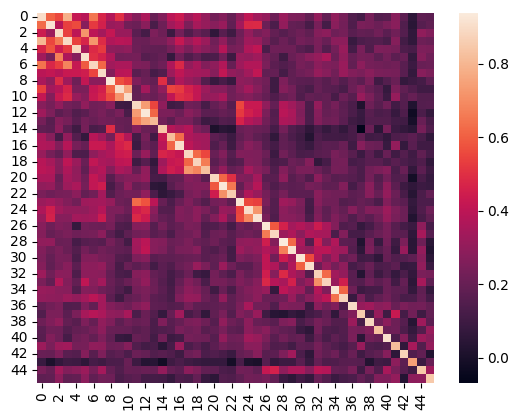

In [23]:
labse_test.plot_similarities()

## use-cmlm-multilingual (Universal Sentence Encoder - Cross-Lingual Masked Language Model)
This model is a variant of the Universal Sentence Encoder (USE) that is trained with a cross-lingual masked language model objective. It is designed to generate embeddings that are effective across multiple languages for various NLP tasks.

- **Maximum Token Support:** 256 tokens per encode.
- **Number of Supported Languages:** 16 languages.
- **Dimensions:** 512 dimensions.

In [24]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('sentence-transformers/use-cmlm-multilingual')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

Some weights of the model checkpoint at sentence-transformers/use-cmlm-multilingual were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [26]:
use_cmlm_test = test_model(model, df)

In [27]:
use_cmlm_test.get_similarities()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.817060,0.352023,0.275598,0.696436,0.115670,0.169568,0.506835,0.115774,0.081445,0.297518,...,-0.095406,-0.048454,-0.043420,-0.101020,-0.052726,0.029428,-0.053752,-0.089068,-0.062653,-0.017268
1,0.307525,0.709201,-0.020579,0.267199,0.284421,-0.059168,0.184823,0.122856,-0.092138,0.082535,...,-0.074928,0.075337,-0.033397,-0.030061,0.024688,0.030216,-0.086384,-0.129854,-0.096408,-0.030983
2,0.272008,0.028222,0.831650,0.425081,0.116336,0.705499,0.328764,0.045122,0.227619,0.111211,...,-0.021328,0.009325,0.012430,-0.029072,0.036881,-0.033286,-0.048667,-0.094466,0.066585,0.069970
3,0.720315,0.308039,0.409145,0.834956,0.194270,0.253326,0.558316,0.133532,0.056210,0.157441,...,-0.121125,-0.030822,-0.049881,-0.095876,-0.067757,0.031742,-0.077139,-0.116560,0.005936,-0.021093
4,0.230570,0.343560,0.087201,0.300404,0.701284,0.000619,0.193903,0.261367,-0.081174,0.088433,...,-0.118074,0.116817,-0.118060,0.021536,0.009245,0.069439,-0.035285,-0.071612,0.053185,0.042188
5,0.171665,-0.010149,0.664169,0.245082,0.015445,0.857408,0.444389,0.141457,0.230538,0.099106,...,0.035076,0.070713,0.050337,-0.021261,0.061132,-0.043592,0.006735,-0.078766,0.086088,0.046950
6,0.493639,0.125592,0.333691,0.552287,0.083680,0.442346,0.809097,0.286802,0.093784,0.184309,...,-0.022323,0.105641,0.015682,0.008961,0.003849,0.020757,-0.043553,-0.064637,0.032114,-0.010850
7,0.089825,0.108591,0.016408,0.131531,0.234094,0.091769,0.217663,0.688561,-0.056106,0.114592,...,0.048366,0.046989,0.038645,-0.027948,-0.012345,0.008233,-0.008103,-0.052030,0.146431,0.044655
8,0.024928,-0.070048,0.227491,0.034395,-0.043912,0.239751,0.067656,-0.046856,0.829812,0.508790,...,-0.009954,0.033749,-0.026910,-0.073643,-0.047898,0.007512,-0.056781,-0.031866,-0.104529,0.031534
9,0.243498,0.039294,0.077682,0.178042,0.007924,0.008743,0.166808,0.134541,0.459791,0.783252,...,0.021831,0.040223,-0.048107,-0.064337,-0.106010,0.055440,-0.013537,0.055671,-0.067766,-0.006438


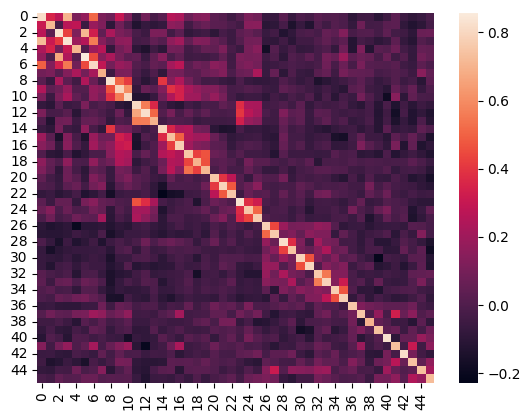

In [28]:
use_cmlm_test.plot_similarities()

## gte-multilingual-base
GTE (General-purpose Text Embedding) is a multilingual model designed to provide robust sentence embeddings across a wide range of languages. It is used for general-purpose sentence embedding tasks, including retrieval, clustering, and classification.

- **Maximum Token Support:** 8192 tokens per encode.
- **Number of Supported Languages:** 100 languages.
- **Dimensions:** 768 dimensions.

In [29]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", trust_remote_code=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/123k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/611M [00:00<?, ?B/s]

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [30]:
gte_base_test = test_model(model, df)

In [32]:
gte_base_test.get_similarities()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.893479,0.641764,0.678456,0.773537,0.544359,0.610361,0.642451,0.382612,0.487934,0.603664,...,0.336541,0.345625,0.296190,0.478802,0.343162,0.438687,0.368162,0.397852,0.396857,0.415230
1,0.662380,0.908119,0.494966,0.562842,0.649096,0.443502,0.542247,0.460969,0.372955,0.521417,...,0.367764,0.441254,0.316935,0.559119,0.406125,0.457476,0.387502,0.397006,0.398246,0.446899
2,0.670334,0.441695,0.871543,0.767340,0.574911,0.753203,0.651814,0.429999,0.550207,0.497589,...,0.351075,0.449905,0.328334,0.479963,0.381321,0.487384,0.375279,0.460674,0.509662,0.479366
3,0.767893,0.531396,0.763326,0.849214,0.622140,0.657872,0.696078,0.437927,0.488873,0.510395,...,0.336695,0.392313,0.297898,0.465632,0.359901,0.473483,0.351570,0.426050,0.457753,0.425899
4,0.565439,0.660140,0.550088,0.636589,0.875084,0.488915,0.574765,0.559029,0.373943,0.430590,...,0.384379,0.412033,0.320241,0.528177,0.447682,0.465321,0.338327,0.416923,0.494130,0.497269
5,0.609561,0.391562,0.768932,0.664300,0.462507,0.883941,0.762785,0.512159,0.539354,0.438471,...,0.365628,0.464614,0.305120,0.483198,0.403291,0.448613,0.356976,0.434364,0.526880,0.477038
6,0.655341,0.463648,0.657763,0.713646,0.489051,0.741329,0.871041,0.556381,0.474263,0.451014,...,0.333919,0.503390,0.260442,0.476221,0.354459,0.421280,0.310717,0.412151,0.459582,0.444544
7,0.422364,0.483913,0.461121,0.480951,0.547939,0.586337,0.631171,0.856762,0.331689,0.396704,...,0.499559,0.494631,0.370746,0.465865,0.462333,0.374092,0.448894,0.433146,0.517076,0.418970
8,0.533046,0.316370,0.573390,0.532249,0.369711,0.574419,0.504691,0.283503,0.861525,0.729962,...,0.360105,0.398123,0.315833,0.426573,0.331095,0.398240,0.396090,0.462235,0.401312,0.413684
9,0.603943,0.457137,0.531067,0.552276,0.432685,0.495788,0.497549,0.434331,0.741306,0.910498,...,0.397554,0.440978,0.322769,0.442821,0.380588,0.410011,0.445144,0.463140,0.396206,0.407312


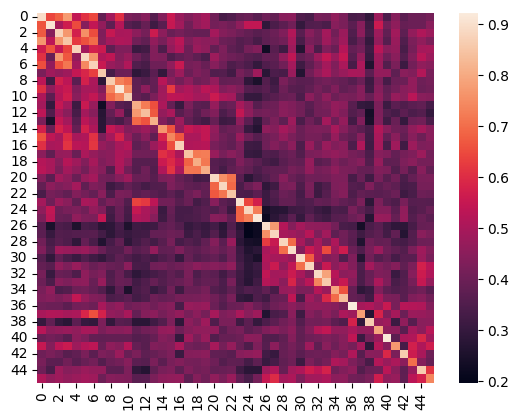

In [33]:
gte_base_test.plot_similarities()

## distiluse-base-multilingual-cased-v2
This model is a distilled version of the multilingual Universal Sentence Encoder. It is optimized for smaller size and faster performance while maintaining good accuracy. It is useful for multilingual semantic similarity and clustering tasks.

- **Maximum Token Support:** 128 tokens per encode.
- **Number of Supported Languages:** 50 languages.
- **Dimensions:** 512 dimensions.

In [34]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [35]:
distiluse_base_test = test_model(model, df)

In [36]:
distiluse_base_test.get_similarities()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.953221,0.697010,0.444811,0.722702,0.533439,0.326845,0.626251,0.364510,0.141175,0.513664,...,-0.088427,0.055489,-0.068610,-0.112007,-0.033942,0.085163,0.019331,-0.121566,-0.061740,0.005296
1,0.737342,0.888057,0.286996,0.643286,0.661288,0.130120,0.505077,0.379649,-0.025977,0.360565,...,-0.105748,0.162088,-0.096171,0.027615,-0.009305,0.170725,-0.051909,-0.081515,-0.086590,0.055292
2,0.353192,0.140080,0.816030,0.518827,0.368956,0.704223,0.429587,0.201497,0.201636,0.122267,...,-0.009413,0.127044,-0.013443,-0.057923,-0.066931,-0.023060,-0.008172,-0.168998,0.098043,0.004926
3,0.730173,0.549789,0.580598,0.877257,0.668987,0.465541,0.764461,0.489984,0.098913,0.290317,...,-0.044399,0.105281,-0.057357,-0.003848,-0.034644,0.150544,0.009659,-0.045895,-0.001884,0.007374
4,0.495578,0.522190,0.297998,0.614803,0.897391,0.227854,0.562265,0.532663,-0.009497,0.225519,...,-0.050501,0.225148,-0.103920,0.046995,0.026902,0.137457,-0.044500,-0.057183,0.094789,0.125044
5,0.264159,0.078549,0.494959,0.241547,0.065851,0.694994,0.361377,0.159618,0.435777,0.129885,...,-0.012906,0.040058,0.062564,-0.134563,-0.054899,-0.035950,0.033487,-0.156784,0.035699,0.059749
6,0.628441,0.431487,0.465542,0.674998,0.445542,0.735065,0.929049,0.618772,0.239637,0.296504,...,-0.052161,0.123944,-0.024636,-0.066407,-0.044539,0.056619,-0.012809,-0.132958,-0.009665,0.024094
7,0.294890,0.340324,0.192227,0.396677,0.430052,0.374402,0.522269,0.866507,0.052205,0.271401,...,0.238929,0.200513,0.069564,0.140954,-0.033961,0.096502,0.030058,-0.004737,0.063902,0.079345
8,0.150646,-0.023801,0.265534,0.127575,-0.011528,0.324549,0.164060,0.043636,0.915594,0.609294,...,0.099554,0.154489,0.045834,-0.161010,-0.059453,-0.045462,0.033727,-0.032764,0.009791,-0.014747
9,0.421603,0.239435,0.196938,0.283259,0.174659,0.124930,0.234802,0.289413,0.642037,0.937820,...,0.074876,0.234202,0.001422,-0.139275,-0.040593,0.028786,0.030114,0.013239,0.022424,-0.021457


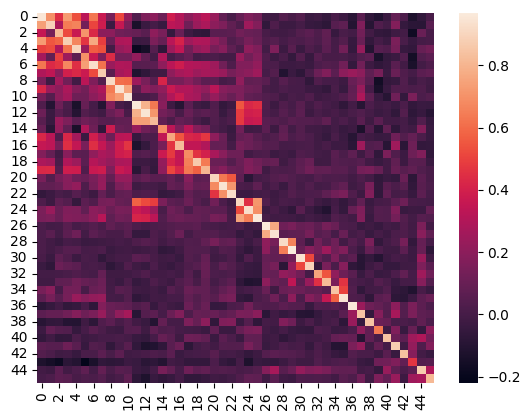

In [37]:
distiluse_base_test.plot_similarities()

## paraphrase-multilingual-MiniLM-L12-v2
This model is based on the MiniLM architecture, which is optimized for efficiency and speed. It is trained to produce multilingual paraphrase embeddings, making it ideal for tasks that involve finding paraphrases or similar sentences across different languages.

- **Maximum Token Support:** 128 tokens per encode.
- **Number of Supported Languages:** 50 languages.
- **Dimensions:** 384 dimensions.

In [38]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [39]:
paraphrase_test = test_model(model, df)

In [40]:
paraphrase_test.get_similarities()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.971148,0.797085,0.230704,0.469238,0.438026,0.348977,0.433626,0.365278,0.175247,0.568592,...,-0.006770,0.064039,-0.033649,0.151900,0.077922,0.129824,0.095582,0.127410,-0.048444,-0.039229
1,0.898719,0.914908,0.263189,0.490442,0.527660,0.366618,0.445865,0.367284,0.186172,0.465023,...,-0.033686,0.086021,-0.052890,0.263379,0.037788,0.138858,0.007002,0.062563,-0.033672,0.005610
2,0.396646,0.359746,0.624339,0.599146,0.458832,0.473250,0.374184,0.277257,0.359011,0.228999,...,-0.046817,0.143340,-0.182384,0.042756,0.000266,0.211059,-0.032473,0.212980,0.093855,0.133121
3,0.564206,0.604105,0.711635,0.939744,0.834724,0.433309,0.567578,0.468300,0.170069,0.149639,...,-0.021956,0.218868,-0.187279,0.051266,-0.007324,0.290192,-0.084944,0.096653,0.184604,0.202626
4,0.483483,0.614826,0.618019,0.851592,0.940159,0.353752,0.506408,0.430073,0.084013,0.065559,...,0.034152,0.216280,-0.105319,0.171725,0.002065,0.234813,-0.062210,0.017383,0.178339,0.241206
5,0.290686,0.251213,0.496182,0.421056,0.247596,0.689055,0.563886,0.462218,0.355905,0.312521,...,-0.091574,0.269068,-0.123695,0.007037,-0.018250,0.279289,0.042414,0.235643,0.153194,0.210828
6,0.385255,0.363177,0.359949,0.526207,0.462044,0.840358,0.983935,0.807286,0.211737,0.259233,...,-0.038221,0.188405,-0.127861,0.026649,0.069014,0.193617,-0.045234,0.073154,0.174236,0.201867
7,0.308311,0.305393,0.214715,0.373991,0.369478,0.738908,0.814493,0.942957,0.196555,0.270242,...,0.122721,0.248902,-0.010232,0.099094,0.075225,0.175170,0.046764,0.094354,0.231715,0.235838
8,0.168452,0.083375,0.231131,0.133855,0.052605,0.314535,0.207741,0.097543,0.941926,0.733256,...,0.039953,0.071374,0.060859,-0.014722,0.058819,0.190797,0.021718,0.393435,0.003814,0.002355
9,0.460141,0.275007,0.061521,0.086959,0.031177,0.266976,0.266054,0.236577,0.614253,0.939968,...,0.075154,0.093193,0.067197,-0.028401,0.122824,0.084413,0.139911,0.301739,-0.059386,-0.030786


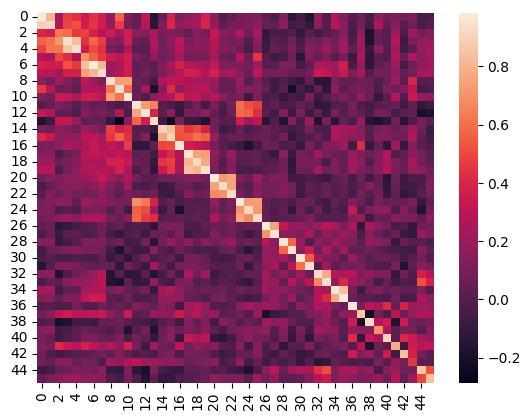

In [41]:
paraphrase_test.plot_similarities()

## nomic-embed-text-v1.5
The nomic-embed-text-v1.5 model is a versatile text embedding model designed for generating high-quality embeddings suitable for various NLP tasks such as search, clustering, and semantic similarity. It is particularly optimized for efficiency and accuracy, making it a good choice for embedding tasks that require a balance between speed and performance.

- **Maximum Token Support:** 8192 tokens per encode.
- **Number of Supported Languages:** This model is primarily designed for English, but it can handle other languages with limited support. The precise number of supported languages isn't typically emphasized as it is more focused on quality embeddings in English.
- **Dimensions:** 768 dimensions.

to use this i want to use lm-studio for testing.

In [2]:
from openai import OpenAI
import numpy as np 

client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def get_embedding(text, model="nomic-ai/nomic-embed-text-v1.5-GGUF"):
    text = text.replace("\n", " ")
    embedded_text = client.embeddings.create(input = [text], model=model).data[0].embedding
    return np.array([embedded_text])

In [3]:
fa_sentences = df.loc[:, 'Persian'].tolist()
en_sentences = df.loc[:, 'English'].tolist()

In [4]:
fa_embeddings = []
en_embeddings = []

for fa_sentence in fa_sentences:
    fa_embeddings.append(get_embedding(fa_sentence))

for en_sentence in en_sentences:
    en_embeddings.append(get_embedding(en_sentence))

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = pd.DataFrame(index=list(range(len(fa_embeddings))), columns=list(range(len(en_embeddings))), dtype=float)

for fa_index in range(len(fa_embeddings)):
    for en_index in range(len(en_embeddings)):
        fa_embed = fa_embeddings[fa_index][0]
        en_embed = en_embeddings[en_index][0]

        similarities.loc[fa_index, en_index] = cosine_similarity(np.array([fa_embed]), np.array([en_embed]))
        
similarities

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.369335,0.362412,0.391610,0.357473,0.373318,0.394181,0.378366,0.326635,0.415881,0.374050,...,0.407625,0.285991,0.368616,0.377287,0.387926,0.371999,0.324399,0.317296,0.353851,0.345456
1,0.347981,0.347441,0.382635,0.352130,0.362574,0.382848,0.360315,0.321431,0.407683,0.363951,...,0.395967,0.296555,0.348729,0.361079,0.401187,0.357861,0.351699,0.334311,0.332049,0.346686
2,0.337658,0.301601,0.365335,0.337281,0.319597,0.393328,0.375259,0.321119,0.363381,0.340402,...,0.362463,0.283530,0.348955,0.340138,0.369059,0.356174,0.315924,0.293585,0.336283,0.309129
3,0.379282,0.368607,0.411597,0.376900,0.371690,0.420626,0.410389,0.347817,0.405351,0.365765,...,0.406002,0.301123,0.383757,0.396871,0.416939,0.380710,0.356867,0.341236,0.379556,0.364073
4,0.341289,0.335115,0.357188,0.327183,0.342020,0.353718,0.342540,0.293797,0.400796,0.352382,...,0.395330,0.281528,0.339898,0.363422,0.396644,0.344736,0.342167,0.338392,0.320455,0.339547
5,0.353476,0.335447,0.370250,0.344682,0.340993,0.369804,0.352744,0.304728,0.382877,0.345962,...,0.390889,0.278296,0.370426,0.361896,0.376428,0.334783,0.314757,0.303440,0.359230,0.319588
6,0.379256,0.363157,0.407618,0.384792,0.374048,0.400057,0.403944,0.330971,0.416172,0.358281,...,0.401393,0.300701,0.376820,0.393161,0.408309,0.370891,0.340272,0.333229,0.364163,0.337539
7,0.345195,0.341511,0.389204,0.362696,0.383673,0.379296,0.371623,0.327200,0.405708,0.364644,...,0.386024,0.270159,0.354675,0.372803,0.390327,0.351378,0.353178,0.350965,0.354260,0.344277
8,0.337364,0.319796,0.360818,0.338436,0.336520,0.352313,0.350541,0.296193,0.373075,0.338640,...,0.378056,0.279792,0.345044,0.354443,0.382865,0.323800,0.324521,0.306636,0.336024,0.310234
9,0.336729,0.336642,0.378016,0.342071,0.362695,0.389180,0.363135,0.325195,0.399355,0.359690,...,0.418452,0.315919,0.373406,0.394753,0.419918,0.350025,0.367101,0.330343,0.356153,0.340856


Matplotlib is building the font cache; this may take a moment.


<Axes: >

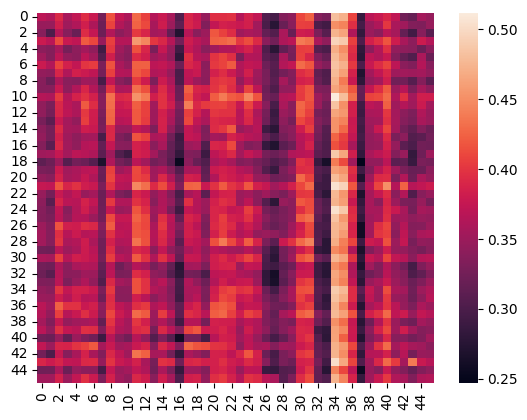

In [6]:
import seaborn as sns


sns.heatmap(similarities)